In [7]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
df = pd.read_csv("Dataset/training_set_rel4.tsv", sep='\t', encoding='ISO-8859-1')
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,100.000000,100.0,100.000000,100.000000,0.0,100.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,50.500000,1.0,4.130000,4.090000,NaN,8.22000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,29.011492,0.0,0.960377,0.975405,NaN,1.83996,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.0,1.000000,1.000000,NaN,2.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,25.750000,1.0,4.000000,4.000000,NaN,7.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,50.500000,1.0,4.000000,4.000000,NaN,8.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,75.250000,1.0,5.000000,5.000000,NaN,10.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,100.000000,1.0,6.000000,6.000000,NaN,12.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        100 non-null    int64  
 1   essay_set       100 non-null    int64  
 2   essay           100 non-null    object 
 3   rater1_domain1  100 non-null    int64  
 4   rater2_domain1  100 non-null    int64  
 5   rater3_domain1  0 non-null      float64
 6   domain1_score   100 non-null    int64  
 7   rater1_domain2  0 non-null      float64
 8   rater2_domain2  0 non-null      float64
 9   domain2_score   0 non-null      float64
 10  rater1_trait1   0 non-null      float64
 11  rater1_trait2   0 non-null      float64
 12  rater1_trait3   0 non-null      float64
 13  rater1_trait4   0 non-null      float64
 14  rater1_trait5   0 non-null      float64
 15  rater1_trait6   0 non-null      float64
 16  rater2_trait1   0 non-null      float64
 17  rater2_trait2   0 non-null      floa

In [11]:
df.shape

(100, 28)

In [12]:
df.isnull().sum()

essay_id            0
essay_set           0
essay               0
rater1_domain1      0
rater2_domain1      0
rater3_domain1    100
domain1_score       0
rater1_domain2    100
rater2_domain2    100
domain2_score     100
rater1_trait1     100
rater1_trait2     100
rater1_trait3     100
rater1_trait4     100
rater1_trait5     100
rater1_trait6     100
rater2_trait1     100
rater2_trait2     100
rater2_trait3     100
rater2_trait4     100
rater2_trait5     100
rater2_trait6     100
rater3_trait1     100
rater3_trait2     100
rater3_trait3     100
rater3_trait4     100
rater3_trait5     100
rater3_trait6     100
dtype: int64

In [13]:
df[df['essay_set']==1]

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,The use of computers is definetly correct. It ...,3,4,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,97,1,"Dear Local @CAPS1, I think computers benefit s...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,98,1,"Dear @ORGANIZATION1, In this new digital age, ...",5,6,NaN,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,99,1,Dear @CAPS1: Have you been sent a photo of a @...,4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop columns which contain Missing values

In [14]:
df.dropna(axis=1,inplace=True)

In [15]:
df.isnull().sum()

essay_id          0
essay_set         0
essay             0
rater1_domain1    0
rater2_domain1    0
domain1_score     0
dtype: int64

In [16]:
df.shape

(100, 6)

In [17]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [18]:
df['essay_set'].value_counts()

1    100
Name: essay_set, dtype: int64

### Drop rater1_domain1 and rater2_domain1

In [19]:
df.drop(columns=['rater1_domain1','rater2_domain1'],inplace=True,axis=1)

In [20]:
df.shape

(100, 4)

In [21]:
df.head()

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8


In [22]:
min(df['domain1_score'])

2

Have a Max value of 12

In [23]:
max(df['domain1_score'])

12

In [24]:
df.skew()

essay_id         0.000000
essay_set        0.000000
domain1_score   -0.619297
dtype: float64

In [25]:
df.kurtosis()

essay_id        -1.20000
essay_set        0.00000
domain1_score    1.22906
dtype: float64

/tmp/ipykernel_64/1034205877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['domain1_score'])


<Axes: xlabel='domain1_score', ylabel='Density'>

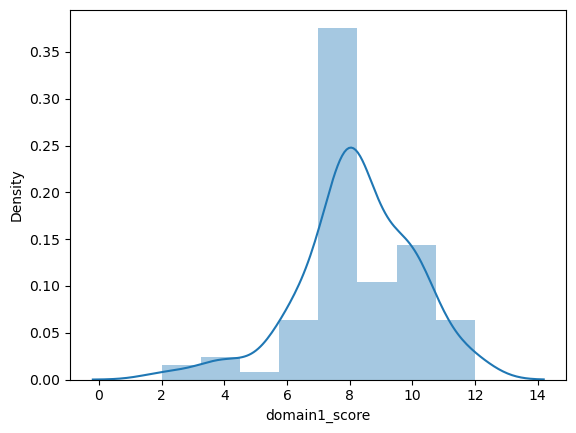

In [26]:
sns.distplot(df['domain1_score'])

In [27]:
df[df['essay_set']==1]['domain1_score']

0      8
1      9
2      7
3     10
4      8
      ..
95     7
96     8
97    11
98     8
99     7
Name: domain1_score, Length: 100, dtype: int64

### Get the Max value and Min value of Each Essay set and form the min_range and max range array

In [28]:
min_range = [2,1,0,0,0,0,0,0]
max_range = [12,6,3,3,4,4,30,60]

def normalize(x,mi,ma):
    print("Before Normalization: "+str(x))
    print("min range =",mi)
    print("max range =",ma)
    x = (x-mi)/(ma-mi)
    print("After Normalization : "+str(x))
    return round(x*10)

df['final_score']=df.apply(lambda x:normalize(x['domain1_score'],min_range[x['essay_set']-1],max_range[x['essay_set']-1]),axis=1)

Before Normalization: 8
min range = 2
max range = 12
After Normalization : 0.6
Before Normalization: 9
min range = 2
max range = 12
After Normalization : 0.7
Before Normalization: 7
min range = 2
max range = 12
After Normalization : 0.5
Before Normalization: 10
min range = 2
max range = 12
After Normalization : 0.8
Before Normalization: 8
min range = 2
max range = 12
After Normalization : 0.6
Before Normalization: 8
min range = 2
max range = 12
After Normalization : 0.6
Before Normalization: 10
min range = 2
max range = 12
After Normalization : 0.8
Before Normalization: 10
min range = 2
max range = 12
After Normalization : 0.8
Before Normalization: 9
min range = 2
max range = 12
After Normalization : 0.7
Before Normalization: 9
min range = 2
max range = 12
After Normalization : 0.7
Before Normalization: 8
min range = 2
max range = 12
After Normalization : 0.6
Before Normalization: 8
min range = 2
max range = 12
After Normalization : 0.6
Before Normalization: 7
min range = 2
max range =

In [29]:
df['final_score']

0     6
1     7
2     5
3     8
4     6
     ..
95    5
96    6
97    9
98    6
99    5
Name: final_score, Length: 100, dtype: int64

In [30]:
df.head()

,essay_id,essay_set,essay,domain1_score,final_score
0,1,1,"Dear local newspaper, I think effects computer...",8,6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,8
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,6


/tmp/ipykernel_64/3249593394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['final_score'])


<Axes: xlabel='final_score', ylabel='Density'>

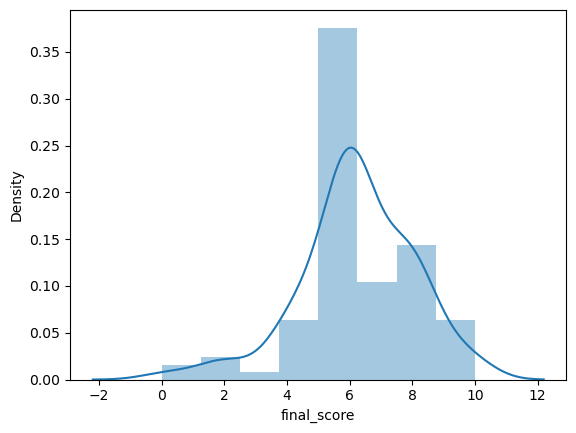

In [31]:
sns.distplot(df['final_score'])

In [32]:
df.skew()

essay_id         0.000000
essay_set        0.000000
domain1_score   -0.619297
final_score     -0.619297
dtype: float64

In [33]:
df.head()

,essay_id,essay_set,essay,domain1_score,final_score
0,1,1,"Dear local newspaper, I think effects computer...",8,6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,8
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,6


In [34]:
df[df['domain1_score']==2]

,essay_id,essay_set,essay,domain1_score,final_score
40,41,1,I think computers are good because you can tal...,2,0


In [35]:
df[df['domain1_score']==12]

,essay_id,essay_set,essay,domain1_score,final_score
15,16,1,"Dear @ORGANIZATION1, The computer blinked to l...",12,10
36,37,1,"Dear @ORGANIZATION1, @CAPS1 has been brought t...",12,10
69,70,1,"Dear @CAPS1 @CAPS2, @CAPS3 life without comput...",12,10


In [36]:
df.describe()

,essay_id,essay_set,domain1_score,final_score
count,100.000000,100.0,100.00000,100.00000
mean,50.500000,1.0,8.22000,6.22000
std,29.011492,0.0,1.83996,1.83996
min,1.000000,1.0,2.00000,0.00000
25%,25.750000,1.0,7.00000,5.00000
50%,50.500000,1.0,8.00000,6.00000
75%,75.250000,1.0,10.00000,8.00000
max,100.000000,1.0,12.00000,10.00000


In [37]:
df.drop('domain1_score',axis=1,inplace=True)

In [38]:
df.head()

,essay_id,essay_set,essay,final_score
0,1,1,"Dear local newspaper, I think effects computer...",6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",7
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",5
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",8
4,5,1,"Dear @LOCATION1, I know having computers has a...",6


## PRE PROCESSING

In [39]:
def clean_essay(essay):
    x=[]
    for i in essay.split():
        if i.startswith("@"):
            continue
        else:
            x.append(i)
    return ' '.join(x)

df['essay'] = df['essay'].apply(lambda x:clean_essay(x))

In [40]:
df.head()

,essay_id,essay_set,essay,final_score
0,1,1,"Dear local newspaper, I think effects computer...",6
1,2,1,Dear I believe that using computers will benef...,7
2,3,1,"Dear, More and more people use computers, but ...",5
3,4,1,"Dear Local Newspaper, I have found that many e...",8
4,5,1,Dear I know having computers has a positive ef...,6


In [41]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/shehan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/shehan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
# Before removing stopwords
df['essay'][0]

"Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy, sea floor spreading or even about the

In [43]:
word_tokenize(df['essay'][0])

['Dear',
 'local',
 'newspaper',
 ',',
 'I',
 'think',
 'effects',
 'computers',
 'have',
 'on',
 'people',
 'are',
 'great',
 'learning',
 'skills/affects',
 'because',
 'they',
 'give',
 'us',
 'time',
 'to',
 'chat',
 'with',
 'friends/new',
 'people',
 ',',
 'helps',
 'us',
 'learn',
 'about',
 'the',
 'globe',
 '(',
 'astronomy',
 ')',
 'and',
 'keeps',
 'us',
 'out',
 'of',
 'troble',
 '!',
 'Thing',
 'about',
 '!',
 'Dont',
 'you',
 'think',
 'so',
 '?',
 'How',
 'would',
 'you',
 'feel',
 'if',
 'your',
 'teenager',
 'is',
 'always',
 'on',
 'the',
 'phone',
 'with',
 'friends',
 '!',
 'Do',
 'you',
 'ever',
 'time',
 'to',
 'chat',
 'with',
 'your',
 'friends',
 'or',
 'buisness',
 'partner',
 'about',
 'things',
 '.',
 'Well',
 'now',
 '-',
 'there',
 "'s",
 'a',
 'new',
 'way',
 'to',
 'chat',
 'the',
 'computer',
 ',',
 'theirs',
 'plenty',
 'of',
 'sites',
 'on',
 'the',
 'internet',
 'to',
 'do',
 'so',
 ':',
 'facebook',
 ',',
 'myspace',
 'ect',
 '.',
 'Just',
 'think',

In [44]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [45]:
stop_words = set(stopwords.words('english')) 
def remove_stop_words(essay):
    word_tokens = word_tokenize(essay) 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

df['clean_essay'] = df['essay'].apply(lambda x:remove_stop_words(x))

In [46]:
# After removing stopwords
df['clean_essay'][0]

"Dear local newspaper , I think effects computers people great learning skills/affects give us time chat friends/new people , helps us learn globe ( astronomy ) keeps us troble ! Thing ! Dont think ? How would feel teenager always phone friends ! Do ever time chat friends buisness partner things . Well - 's new way chat computer , plenty sites internet : facebook , myspace ect . Just think setting meeting boss computer , teenager fun phone rushing get cause want use . How learn countrys/states outside ? Well I computer/internet , 's new way learn going time ! You might think child spends lot time computer , ask question economy , sea floor spreading even 'll surprise much he/she knows . Believe computer much interesting class day reading books . If child home computer local library , 's better friends fresh , perpressured something know isnt right . You might know child , forbidde hospital bed drive-by . Rather child computer learning , chatting playing games , safe sound home communit

In [47]:
def remove_puncs(essay):
    essay = re.sub("[^A-Za-z ]","",essay)
    return essay

df['clean_essay'] = df['clean_essay'].apply(lambda x:remove_puncs(x))

In [48]:
# After removing punctuation marks
df['clean_essay'][0]

'Dear local newspaper  I think effects computers people great learning skillsaffects give us time chat friendsnew people  helps us learn globe  astronomy  keeps us troble  Thing  Dont think  How would feel teenager always phone friends  Do ever time chat friends buisness partner things  Well  s new way chat computer  plenty sites internet  facebook  myspace ect  Just think setting meeting boss computer  teenager fun phone rushing get cause want use  How learn countrysstates outside  Well I computerinternet  s new way learn going time  You might think child spends lot time computer  ask question economy  sea floor spreading even ll surprise much heshe knows  Believe computer much interesting class day reading books  If child home computer local library  s better friends fresh  perpressured something know isnt right  You might know child  forbidde hospital bed driveby  Rather child computer learning  chatting playing games  safe sound home community place  Now I hope reached point unders

In [49]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...


In [50]:
def sent2word(x):
    x=re.sub("[^A-Za-z0-9]"," ",x)
    words=nltk.word_tokenize(x)
    return words

def essay2word(essay):
    essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw = tokenizer.tokenize(essay)
    final_words=[]
    for i in raw:
        if(len(i)>0):
            final_words.append(sent2word(i))
    print(final_words)
    return final_words
        

def noOfWords(essay):
    count=0
    for i in essay2word(essay):
        count=count+len(i)
    return count

def noOfChar(essay):
    count=0
    for i in essay2word(essay):
        for j in i:
            count=count+len(j)
    return count

def avg_word_len(essay):
    return noOfChar(essay)/noOfWords(essay)

def noOfSent(essay):
    return len(essay2word(essay))

def count_pos(essay):
    sentences = essay2word(essay)
    noun_count=0
    adj_count=0
    verb_count=0
    adverb_count=0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if(pos_tag[0]=='N'):
                noun_count+=1
            elif(pos_tag[0]=='V'):
                verb_count+=1
            elif(pos_tag[0]=='J'):
                adj_count+=1
            elif(pos_tag[0]=='R'):
                adverb_count+=1
    return noun_count,verb_count,adj_count,adverb_count

data = open('big.txt').read()
words = re.findall('[a-z]+', data.lower())

def check_spell_error(essay):
    essay=essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    count=0
    all_words = new_essay.split()
    for i in all_words:
        if i not in words:
            count+=1
    return count

In [51]:
df.head()

,essay_id,essay_set,essay,final_score,clean_essay
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...


In [52]:
df['clean_essay']

0     Dear local newspaper  I think effects computer...
1     Dear I believe using computers benefit us many...
2     Dear  More people use computers  everyone agre...
3     Dear Local Newspaper  I found many experts say...
4     Dear I know computers positive effect people  ...
                            ...                        
95    The use computers definetly correct  It helpfu...
96    Dear Local I think computers benefit society g...
97    Dear In new digital age  computors beaming adv...
98    Dear Have sent photo year old child clothes  W...
99    Dear local newspaper  know long go computer  W...
Name: clean_essay, Length: 100, dtype: object

### Preapring for Machine Learning

In [78]:
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(df['clean_essay'])

feature_names = vectorizer.get_feature_names_out()
#print(feature_names)

data = df[['essay_set','clean_essay','final_score']].copy()
# print(data.head())

X = count_vectors.toarray()
y = data['final_score'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [79]:
X.shape

(100, 10000)

In [80]:
y

array([ 6,  7,  5,  8,  6,  6,  8,  8,  7,  7,  6,  6,  5,  4,  4, 10,  6,
        6,  2,  4,  6,  1,  8,  9,  6,  7,  2,  7,  7,  6,  8,  8,  4,  6,
        7,  8, 10,  6,  8,  5,  0,  6,  4,  6,  6,  6,  6,  9,  4,  3,  7,
        5,  6,  8,  6,  8,  7,  5,  6,  2,  6,  6,  6,  5,  7,  7,  6,  7,
        5, 10,  8,  8,  6,  5,  6,  6,  8,  8,  8,  6,  6,  6,  5,  4,  8,
        6,  8,  7,  4,  5,  6,  9,  9,  6,  8,  5,  6,  9,  6,  5])

In [81]:
# Visualize the count_vectors as a data frame
count_array = count_vectors.toarray()
df_1 = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df_1

,abd,abilities,ability,ability computers,ability learn,ability learn far,ability learn faraway,ability learn subject,ability talk,able,...,zap,zap theres,zap theres need,zero,zero thing,zero thing sure,zip,zip code,zip code heavy,zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,2,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df_1.shape

(100, 10000)

## Machine learning algorithms

Linear Regression

In [83]:
# Save Trained Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
pickle.dump(linear_regressor, open("Saved_Models/LR_without_PP",'wb'))

In [84]:
# Use Saved Model
model = pickle.load(open("Saved_Models/LR_without_PP",'rb'))
y_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 2.24


In [85]:
X_test.shape

(30, 10000)

In [86]:
y_pred.shape

(30,)

Support Vector Regression

In [87]:
# Save Trained Model
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)
pickle.dump(clf,open("Saved_Models/SVR_without_PP",'wb'))

In [88]:
# Use Saved Model
clf = pickle.load(open('Saved_Models/SVR_without_PP', 'rb'))
y_pred=clf.predict(X_test)
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred))

Mean squared error:1.66


In [89]:
y_pred

array([6.87868409, 4.25370146, 6.98349822, 6.21895131, 6.55294963,
       4.77297317, 6.42777563, 7.3526993 , 4.81206687, 6.41004319,
       6.41814702, 6.91580337, 6.9123426 , 6.07263528, 7.73590922,
       6.56708541, 5.75360075, 6.20602629, 6.28066326, 6.7239111 ,
       5.50415152, 6.02987209, 6.36881418, 6.93534298, 5.41350276,
       6.95886687, 6.91491134, 7.1390453 , 6.64765178, 7.0325073 ])

Random Forest

In [90]:
# Save Trained Model
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
pickle.dump(rf, open('Saved_Models/RF_without_PP', 'wb'))

In [91]:
# Use Saved Model
rf = pickle.load(open('Saved_Models/RF_without_PP', 'rb'))
predictions = rf.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 1.66


In [92]:
predictions

array([6.587, 3.688, 6.168, 5.934, 6.694, 5.598, 6.524, 6.692, 5.791,
       5.719, 5.761, 5.957, 5.699, 6.206, 6.137, 5.363, 6.272, 6.269,
       5.694, 6.551, 5.037, 6.28 , 6.06 , 7.25 , 6.493, 6.432, 6.868,
       5.165, 6.521, 6.325])

## Machine learning algorithms with preprocessing

In [93]:
pro_data = df.copy()
pro_data

,essay_id,essay_set,essay,final_score,clean_essay
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...
...,...,...,...,...,...
95,96,1,The use of computers is definetly correct. It ...,5,The use computers definetly correct It helpfu...
96,97,1,Dear Local I think computers benefit society g...,6,Dear Local I think computers benefit society g...
97,98,1,"Dear In this new digital age, computors are be...",9,Dear In new digital age computors beaming adv...
98,99,1,Dear Have you been sent a photo of a year old ...,6,Dear Have sent photo year old child clothes W...


In [94]:
pro_data['char_count'] = pro_data['essay'].apply(noOfChar)
pro_data['word_count'] = pro_data['essay'].apply(noOfWords)
pro_data['sent_count'] = pro_data['essay'].apply(noOfSent)
pro_data['avg_word_len'] = pro_data['essay'].apply(avg_word_len)
pro_data['spell_err_count'] = pro_data['essay'].apply(check_spell_error)
pro_data['noun_count'], pro_data['adj_count'], pro_data['verb_count'], pro_data['adv_count'] = zip(*pro_data['essay'].map(count_pos))

[['Dear', 'local', 'newspaper', 'I', 'think', 'effects', 'computers', 'have', 'on', 'people', 'are', 'great', 'learning', 'skills', 'affects', 'because', 'they', 'give', 'us', 'time', 'to', 'chat', 'with', 'friends', 'new', 'people', 'helps', 'us', 'learn', 'about', 'the', 'globe', 'astronomy', 'and', 'keeps', 'us', 'out', 'of', 'troble'], ['Thing', 'about'], ['Dont', 'you', 'think', 'so'], ['How', 'would', 'you', 'feel', 'if', 'your', 'teenager', 'is', 'always', 'on', 'the', 'phone', 'with', 'friends'], ['Do', 'you', 'ever', 'time', 'to', 'chat', 'with', 'your', 'friends', 'or', 'buisness', 'partner', 'about', 'things'], ['Well', 'now', 'there', 's', 'a', 'new', 'way', 'to', 'chat', 'the', 'computer', 'theirs', 'plenty', 'of', 'sites', 'on', 'the', 'internet', 'to', 'do', 'so', 'facebook', 'myspace', 'ect'], ['Just', 'think', 'now', 'while', 'your', 'setting', 'up', 'meeting', 'with', 'your', 'boss', 'on', 'the', 'computer', 'your', 'teenager', 'is', 'having', 'fun', 'on', 'the', 'pho

[['Dear', 'Local', 'Newspaper', 'I', 'belive', 'that', 'computers', 'have', 'a', 'negative', 'effect', 'on', 'peoples', 'lives'], ['I', 'belive', 'this', 'because', 'who', 'spend', 'to', 'much', 'time', 'on', 'the', 'computer', 'don', 't', 'get', 'out', 'as', 'much', 'as', 'they', 'should', 'don', 't', 'spend', 'enough', 'time', 'with', 'their', 'family', 'and', 'the', 'computer', 'can', 't', 'do', 'everything'], ['My', 'first', 'reason', 'is', 'I', 'belive', 'that', 'people', 'need', 'to', 'get', 'out', 'more'], ['When', 'they', 'don', 't', 'get', 'out', 'they', 'don', 't', 'exersise', 'and', 'that', 'is', 'very', 'unhealthy'], ['Instead', 'of', 'watching', 'the', 'games', 'or', 'the', 'scores', 'they', 'should', 'get', 'out', 'and', 'play', 'the', 'game'], ['I', 'also', 'belive', 'that', 'they', 'should', 'enjoy', 'nature', 'because', 'I', 'feel', 'like', 'they', 'are', 'wasting', 'the', 'beauty', 'of', 'nature', 'all', 'around', 'them'], ['We', 'wouldn', 't', 'want', 'to', 'waste', 

[['Dear', 'I', 'think', 'computers', 'have', 'a', 'positive', 'effect', 'on', 'people'], ['Where', 'would', 'we', 'be', 'without', 'them'], ['Computers', 'teach', 'hand', 'eye', 'coordination', 'give', 'people', 'the', 'ability', 'to', 'learn', 'about', 'any', 'subject', 'they', 'want', 'and', 'allow', 'people', 'to', 'communicate', 'with', 'each', 'other', 'no', 'matter', 'how', 'far', 'away'], ['Obviously', 'computers', 'are', 'beneficial'], ['I', 'think', 'computers', 'have', 'a', 'positive', 'effect', 'on', 'people'], ['They', 'teach', 'hand', 'eye', 'coordination', 'as', 'I', 'said', 'earlier'], ['I', 'know', 'people', 'say', 'that', 'where', 'you', 'are', 'on', 'be', 'computer', 'you', 'spend', 'less', 'time', 'exercising', 'but', 'the', 'computers', 'help', 'you', 'with', 'you', 'throwing', 'skills'], ['Hand', 'ey', 'coordination', 'also', 'applies', 'for', 'if', 'you', 'want', 'to', 'be', 'a', 'surgeon', 'doctor'], ['You', 'need', 'to', 'have', 'steady', 'hands'], ['What', 'we'

[['Dear', 'Local', 'Newspaper', 'I', 'am', 'an', 'grade', 'student', 'at', 'I', 'was', 'reading', 'your', 'paper', 'and', 'I', 'notice', 'you', 'had', 'an', 'article', 'on', 'how', 'people', 'are', 'spending', 'too', 'much', 'time', 'on', 'the', 'computer', 'and', 'not', 'enough', 'time', 'going', 'outside', 'getting', 'exercise', 'enjoying', 'nature', 'and', 'that', 'it', 'doesn', 't', 'benifit', 'society'], ['i', 'completly', 'disagree', 'with', 'these', 'comments'], ['let', 'me', 'explain', 'Having', 'computers', 'definatly', 'benifits', 'for', 'all', 'students'], ['Sometimes', 'kids', 'forget', 'their', 'text', 'books', 'at', 'school'], ['But', 'if', 'they', 'have', 'a', 'computer', 'they', 'can', 'just', 'google', 'the', 'information'], ['That', 'way', 'they', 'get', 'there', 'homework', 'done', 'and', 'don', 't', 'have', 'to', 'take', 'a', 'zero'], ['Another', 'thing', 'is', 'I', 'am', 'sure', 'you', 'have', 'heard', 'of', 'a', 'website', 'called', 'study', 'island'], ['If', 'you

[['Hello', 'I', 'decided', 'to', 'write', 'in', 'to', 'the', 'paper', 'on', 'the', 'topic', 'of', 'computers', 'and', 'how', 'they', 'benefit', 'society'], ['Comuters', 'are', 'powerful', 'machines', 'and', 'can', 'be', 'used', 'completing', 'otherwise', 'menial', 'and', 'boring', 'tasks'], ['They', 'benefit', 'people', 'in', 'many', 'ways', 'like', 'they', 'are', 'very', 'useful', 'in', 'buissness', 'helpful', 'in', 'education', 'and', 'connect', 'friends', 'and', 'family', 'together'], ['Computers', 'are', 'uselful', 'in', 'buissness', 'and', 'are', 'an', 'extremely', 'important', 'tool', 'in', 'a', 'common', 'workplace', 'today', 'and', 'make', 'work', 'get', 'done', 'much', 'more', 'efficiently', 'than', 'if', 'they', 'didn', 't', 'have', 'computers'], ['One', 'reason', 'Computers', 'are', 'so', 'useful', 'in', 'the', 'workplace', 'is', 'because', 'computers', 'can', 'storee', 'far', 'more', 'data', 'that', 'can', 'be', 'put', 'on', 'paper'], ['Also', 'they', 'can', 'do', 'jobs', '

[['Computers'], ['One', 'of', 'the', 'much', 'enjoyed', 'pieces', 'of', 'technology'], ['But', 'it', 'is', 'also', 'one', 'of', 'the', 'many', 'distractions'], ['Many', 'people', 'ponder', 'if', 'computers', 'are', 'really', 'beneficial'], ['I', 'am', 'one', 'of', 'those', 'thinkers'], ['I', 'think', 'that', 'computers', 'don', 't', 'always', 'benefit', 'society'], ['They', 'have', 'many', 'many', 'distractions', 'such', 'as', 'facebook', 'online', 'games', 'and', 'even', 'inappropriate', 'images', 'and', 'videos'], ['If', 'you', 'really', 'think', 'of', 'it', 'are', 'computers', 'as', 'beneficial', 'as', 'we', 'think'], ['My', 'friend', 'was', 'just', 'told', 'about', 'facebook', 'and', 'got', 'a', 'membership'], ['It', 'just', 'started', 'out', 'as', 'a', 'na', 'big', 'deal', 'kind', 'of', 'thing'], ['She', 'went', 'online', 'often', 'just', 'to', 'check', 'on', 'her', 'status', 'and', 'if', 'she', 'had', 'any', 'messages', 'in', 'her', 'inbox', 'and', 'that', 's', 'But', 'then', 'sh

[['Dear', 'Local', 'Newspaper', 'I', 'have', 'found', 'that', 'many', 'experts', 'say', 'that', 'computers', 'do', 'not', 'benifit', 'our', 'society'], ['In', 'some', 'cases', 'this', 'is', 'true', 'but', 'in', 'most', 'cases', 'studdies', 'show', 'that', 'computers', 'can', 'help', 'people'], ['While', 'nothing', 'beats', 'talking', 'in', 'person', 'computers', 'can', 'get', 'really', 'close', 'such', 'examples', 'are', 'webcams', 'or', 'e', 'mail'], ['of', 'students', 'who', 'get', 'good', 'grades', 'refer', 'to', 'reliable', 'websites', 'for', 'reasearch', 'or', 'to', 'help', 'find', 'good', 'books'], ['Also', 'online', 'catalouges', 'or', 'advertisments', 'help', 'the', 'economy', 'of', 'stores', 'worldwide'], ['people', 'were', 'not', 'allowed', 'to', 'use', 'computers', 'most', 'of', 'the', 'modern', 'would', 'not', 'exist'], ['said', 'that', 'the', 'best', 'form', 'of', 'modern', 'communication', 'is', 'the', 'computer', 'because', 'of', 'the', 'ability', 'to', 'write', 'talk', 

[['Dear', 'Local', 'Newspaper', 'I', 'belive', 'that', 'computers', 'have', 'a', 'negative', 'effect', 'on', 'peoples', 'lives'], ['I', 'belive', 'this', 'because', 'who', 'spend', 'to', 'much', 'time', 'on', 'the', 'computer', 'don', 't', 'get', 'out', 'as', 'much', 'as', 'they', 'should', 'don', 't', 'spend', 'enough', 'time', 'with', 'their', 'family', 'and', 'the', 'computer', 'can', 't', 'do', 'everything'], ['My', 'first', 'reason', 'is', 'I', 'belive', 'that', 'people', 'need', 'to', 'get', 'out', 'more'], ['When', 'they', 'don', 't', 'get', 'out', 'they', 'don', 't', 'exersise', 'and', 'that', 'is', 'very', 'unhealthy'], ['Instead', 'of', 'watching', 'the', 'games', 'or', 'the', 'scores', 'they', 'should', 'get', 'out', 'and', 'play', 'the', 'game'], ['I', 'also', 'belive', 'that', 'they', 'should', 'enjoy', 'nature', 'because', 'I', 'feel', 'like', 'they', 'are', 'wasting', 'the', 'beauty', 'of', 'nature', 'all', 'around', 'them'], ['We', 'wouldn', 't', 'want', 'to', 'waste', 

[['Dear', 'I', 'think', 'computers', 'have', 'a', 'positive', 'effect', 'on', 'people'], ['Where', 'would', 'we', 'be', 'without', 'them'], ['Computers', 'teach', 'hand', 'eye', 'coordination', 'give', 'people', 'the', 'ability', 'to', 'learn', 'about', 'any', 'subject', 'they', 'want', 'and', 'allow', 'people', 'to', 'communicate', 'with', 'each', 'other', 'no', 'matter', 'how', 'far', 'away'], ['Obviously', 'computers', 'are', 'beneficial'], ['I', 'think', 'computers', 'have', 'a', 'positive', 'effect', 'on', 'people'], ['They', 'teach', 'hand', 'eye', 'coordination', 'as', 'I', 'said', 'earlier'], ['I', 'know', 'people', 'say', 'that', 'where', 'you', 'are', 'on', 'be', 'computer', 'you', 'spend', 'less', 'time', 'exercising', 'but', 'the', 'computers', 'help', 'you', 'with', 'you', 'throwing', 'skills'], ['Hand', 'ey', 'coordination', 'also', 'applies', 'for', 'if', 'you', 'want', 'to', 'be', 'a', 'surgeon', 'doctor'], ['You', 'need', 'to', 'have', 'steady', 'hands'], ['What', 'we'

[['Dear', 'Local', 'Newspaper', 'I', 'am', 'an', 'grade', 'student', 'at', 'I', 'was', 'reading', 'your', 'paper', 'and', 'I', 'notice', 'you', 'had', 'an', 'article', 'on', 'how', 'people', 'are', 'spending', 'too', 'much', 'time', 'on', 'the', 'computer', 'and', 'not', 'enough', 'time', 'going', 'outside', 'getting', 'exercise', 'enjoying', 'nature', 'and', 'that', 'it', 'doesn', 't', 'benifit', 'society'], ['i', 'completly', 'disagree', 'with', 'these', 'comments'], ['let', 'me', 'explain', 'Having', 'computers', 'definatly', 'benifits', 'for', 'all', 'students'], ['Sometimes', 'kids', 'forget', 'their', 'text', 'books', 'at', 'school'], ['But', 'if', 'they', 'have', 'a', 'computer', 'they', 'can', 'just', 'google', 'the', 'information'], ['That', 'way', 'they', 'get', 'there', 'homework', 'done', 'and', 'don', 't', 'have', 'to', 'take', 'a', 'zero'], ['Another', 'thing', 'is', 'I', 'am', 'sure', 'you', 'have', 'heard', 'of', 'a', 'website', 'called', 'study', 'island'], ['If', 'you

[['Hello', 'I', 'decided', 'to', 'write', 'in', 'to', 'the', 'paper', 'on', 'the', 'topic', 'of', 'computers', 'and', 'how', 'they', 'benefit', 'society'], ['Comuters', 'are', 'powerful', 'machines', 'and', 'can', 'be', 'used', 'completing', 'otherwise', 'menial', 'and', 'boring', 'tasks'], ['They', 'benefit', 'people', 'in', 'many', 'ways', 'like', 'they', 'are', 'very', 'useful', 'in', 'buissness', 'helpful', 'in', 'education', 'and', 'connect', 'friends', 'and', 'family', 'together'], ['Computers', 'are', 'uselful', 'in', 'buissness', 'and', 'are', 'an', 'extremely', 'important', 'tool', 'in', 'a', 'common', 'workplace', 'today', 'and', 'make', 'work', 'get', 'done', 'much', 'more', 'efficiently', 'than', 'if', 'they', 'didn', 't', 'have', 'computers'], ['One', 'reason', 'Computers', 'are', 'so', 'useful', 'in', 'the', 'workplace', 'is', 'because', 'computers', 'can', 'storee', 'far', 'more', 'data', 'that', 'can', 'be', 'put', 'on', 'paper'], ['Also', 'they', 'can', 'do', 'jobs', '

[['Dear', 'Newspaper', 'computers', 'become', 'more', 'and', 'more', 'a', 'part', 'of', 'everyday', 'life', 'people', 'begin', 'to', 'question', 'wether', 'or', 'not', 'they', 'have', 'a', 'positive', 'impact', 'on', 'people'], ['Computers', 'are', 'a', 'technological', 'wonder', 'that', 'has', 'a', 'positive', 'effect', 'on', 'people'], ['The', 'world', 'wide', 'web', 'unlimited', 'socialization', 'and', 'simulations', 'are', 'just', 'a', 'few', 'of', 'the', 'benefits', 'of', 'computers'], ['The', 'internet', 'provides', 'acess', 'to', 'the', 'world', 'wide', 'we'], ['Infinite', 'amounts', 'of', 'information', 'can', 'be', 'found', 'on', 'your', 'computer'], ['CAPS2', 'in', 'almost', 'everyday', 'school', 'rely', 'on', 'the', 'internet', 'to', 'gain', 'information', 'stated', 'education', 'secretary', 'Also', 'search', 'engines', 'provide', 'acess', 'to', 'thousands', 'of', 'information', 'loaded', 'pages'], ['In', 'addition', 'to', 'unlimited', 'information', 'the', 'web', 'olds', 't

[['Dear', 'local', 'newspaper', 'I', 'think', 'effects', 'computers', 'have', 'on', 'people', 'are', 'great', 'learning', 'skills', 'affects', 'because', 'they', 'give', 'us', 'time', 'to', 'chat', 'with', 'friends', 'new', 'people', 'helps', 'us', 'learn', 'about', 'the', 'globe', 'astronomy', 'and', 'keeps', 'us', 'out', 'of', 'troble'], ['Thing', 'about'], ['Dont', 'you', 'think', 'so'], ['How', 'would', 'you', 'feel', 'if', 'your', 'teenager', 'is', 'always', 'on', 'the', 'phone', 'with', 'friends'], ['Do', 'you', 'ever', 'time', 'to', 'chat', 'with', 'your', 'friends', 'or', 'buisness', 'partner', 'about', 'things'], ['Well', 'now', 'there', 's', 'a', 'new', 'way', 'to', 'chat', 'the', 'computer', 'theirs', 'plenty', 'of', 'sites', 'on', 'the', 'internet', 'to', 'do', 'so', 'facebook', 'myspace', 'ect'], ['Just', 'think', 'now', 'while', 'your', 'setting', 'up', 'meeting', 'with', 'your', 'boss', 'on', 'the', 'computer', 'your', 'teenager', 'is', 'having', 'fun', 'on', 'the', 'pho

[['Dear', 'Local', 'Newspaper', 'I', 'must', 'admit', 'that', 'the', 'experts', 'are', 'centainly', 'right', 'cause', 'I', 'know', 'people', 'that', 'stay', 'on', 'the', 'computer', 'all', 'day', 'and', 'that', 's', 'really', 'not', 'good', 'if', 'you', 'ask', 'me'], ['Instead', 'of', 'being', 'on', 'computers', 'learning', 'about', 'faraway', 'places', 'and', 'talking', 'to', 'other', 'people', 'you', 'should', 'go', 'exercising', 'you', 'should', 'relax', 'and', 'you', 'should', 'interact', 'with', 'family', 'and', 'friends'], ['Exercising', 'is', 'much', 'more', 'better', 'than', 'being', 'on', 'a', 'computer', 'and', 'I', 'say', 'that', 'to', 'say', 'this'], ['When', 'your', 'on', 'a', 'computer', 'just', 'sitting', 'there', 'playing', 'online', 'games', 'and', 'checking', 'other', 'things', 'out', 'or', 'whatever', 'the', 'case', 'be', 'you', 'get', 'board', 'and', 'hungry', 'and', 'I', 'know', 'theres', 'some', 'snacks', 'around', 'you', 'while', 'your', 'doing', 'whatever', 'you

[['Dear', 'is', 'a', 'rumor', 'going', 'around', 'saying', 'that', 'computers', 'are', 'a', 'negitive', 'affect', 'in', 'a', 'childs', 'life'], ['I', 'disagree'], ['A', 'computer', 'can', 'help', 'a', 'kid', 'in', 'so', 'many', 'ways', 'it', 'can', 'help', 'students', 'with', 'homework', 'let', 'students', 'talk', 'to', 'friends', 'and', 'help', 'with', 'school', 'projects'], ['And', 'besides', 'most', 'kids', 'don', 't', 'don', 't', 'stay', 'on', 'the', 'computer', 'very', 'long', 'anyways'], ['Homeworks', 'it', 's', 'a', 'big', 'role', 'in', 'school', 'if', 'you', 'don', 't', 'do', 'it', 'or', 'worse', 'don', 't', 'get', 'it', 'can', 'you', 'down'], ['That', 's', 'why', 'computers', 'have', 'websites', 'that', 'help', 'a', 'child', 'learn', 'how', 'do', 'do', 'a', 'problem', 'or', 'a', 'social', 'studies', 'question', 'if', 'they', 'don', 't', 'know'], ['If', 'you', 'go', 'to', 'the', 'school', 'web', 'page', 'then', 'theres', 'a', 'link', 'that', 'brings', 'you', 'in', 'a', 'math', 

[['ARE', 'YOU', 'Computers', 'are', 'great', 'they', 're', 'great', 'because', 'of', 'these', 'reasons'], ['Kids', 'can', 'do', 'homework', 'on', 'computers', 'also', 'you', 'could', 'video', 'chat', 'with', 'friends', 'and', 'family', 'finally', 'because', 'you', 'could', 'look', 'up', 'just', 'about', 'anything', 'you', 'want', 'on', 'the', 'computer'], ['Computers', 'are', 'great', 'because', 'kids', 'can', 'do', 'there', 'homework', 'on', 'the', 'computer', 'thats', 'good', 'because', 'if', 'they', 'forgot', 'there', 'book', 'in', 'school', 'or', 'something', 'like', 'that', 'then', 'they', 'could', 'just', 'get', 'the', 'answers', 'of', 'the', 'computer'], ['Its', 'also', 'good', 'for', 'business', 'men', 'because', 'they', 'count', 'on', 'computers', 'for', 'all', 'there', 'files'], ['Computer', 'are', 'also', 'great', 'because', 'you', 'can', 'video', 'chat', 'with', 'friends', 'and', 'family'], ['Video', 'chatins', 'is', 'awesome', 'because', 'if', 'a', 'friend', 'or', 'relativ

[['Dear', 'The', 'CAPS1', 'goes', 'the', 'floor'], ['CAPS4', 'oh', 'here', 'comes', 'pete'], ['CAPS5', 'is', 'he', 'getting', 'fat'], ['all', 'he', 'does', 'is', 'play', 'on', 'the', 'computer', 'all', 'day', 'long'], ['is', 'on', 'increasing', 'amount', 'or', 'teenagers', 'throught', 'the', 'who', 'are', 'playing', 'on', 'the', 'computer', 'too', 'much'], ['This', 'is', 'needs', 'to', 'stop'], ['CAPS7', 'playing', 'on', 'computers', 'is', 'one', 'of', 'the', 'worst', 'things', 'that', 'they', 'can', 'do', 'with', 'their', 'time'], ['of', 'the', 'international', 'health', 'committee'], ['are', 'always', 'going', 'to', 'be', 'obesse', 'people', 'around', 'the', 'world', 'but', 'in', 'the', 'past', 'years', 'has', 'doubled', 'the', 'amount', 'of', 'obese', 'in', 'all', 'of', 'show', 'that', 'over', 'of', 'the', 'american', 'population', 'is', 'obese', 'and', 'very', 'much', 'so'], ['The', 'future', 'of', 'american', 'is', 'all', 'obese', 'lazy', 'who', 'only', 'want', 'to', 'sit', 'down'

[['Dear', 'Newspaper', 'CAPS1', 'no'], ['I', 'forgot', 'the', 'deffinition', 'to', 'this', 'homework', 'problem', 'and', 'I', 'don', 't', 'have', 'my', 'notes'], ['Now', 'in', 'this', 'situation', 'a', 'computer', 'would', 'be', 'very', 'helpful', 'to', 'just', 'type', 'in', 'the', 'word', 'and', 'get', 'a', 'whole', 'bunch', 'of', 'results'], ['This', 'is', 'why', 'I', 'believe', 'having', 'access', 'to', 'a', 'computer', 'at', 'all', 'times', 'is', 'very', 'helpfull', 'because', 'you', 'can', 'find', 'information', 'that', 'you', 've', 'been', 'needing'], ['You', 'can', 'get', 'in', 'touch', 'with', 'a', 'friend', 'if', 'you', 'need', 'to', 'or', 'just', 'to', 'talk', 'to', 'lostly', 'if', 'you', 'are', 'just', 'sitting', 'around', 'and', 'having', 'nothing', 'to', 'do', 'you', 'can', 'just', 'go', 'on', 'the', 'computer', 'and', 'discover', 'things', 'you', 'not', 'have', 'known'], ['Having', 'access', 'to', 'a', 'computer', 'is', 'a', 'real', 'and', 'very', 'helpfull', 'because', '

[['Dear', 'Local', 'Newspaper', 'I', 'have', 'found', 'that', 'many', 'experts', 'say', 'that', 'computers', 'do', 'not', 'benifit', 'our', 'society'], ['In', 'some', 'cases', 'this', 'is', 'true', 'but', 'in', 'most', 'cases', 'studdies', 'show', 'that', 'computers', 'can', 'help', 'people'], ['While', 'nothing', 'beats', 'talking', 'in', 'person', 'computers', 'can', 'get', 'really', 'close', 'such', 'examples', 'are', 'webcams', 'or', 'e', 'mail'], ['of', 'students', 'who', 'get', 'good', 'grades', 'refer', 'to', 'reliable', 'websites', 'for', 'reasearch', 'or', 'to', 'help', 'find', 'good', 'books'], ['Also', 'online', 'catalouges', 'or', 'advertisments', 'help', 'the', 'economy', 'of', 'stores', 'worldwide'], ['people', 'were', 'not', 'allowed', 'to', 'use', 'computers', 'most', 'of', 'the', 'modern', 'would', 'not', 'exist'], ['said', 'that', 'the', 'best', 'form', 'of', 'modern', 'communication', 'is', 'the', 'computer', 'because', 'of', 'the', 'ability', 'to', 'write', 'talk', 

[['Dear', 'reader', 'has', 'had', 'a', 'dramatic', 'effect', 'on', 'human', 'life'], ['It', 'has', 'changed', 'the', 'way', 'we', 'do', 'almost', 'everything', 'today'], ['The', 'most', 'well', 'know', 'is', 'the', 'computer'], ['This', 'device', 'has', 'allowed', 'people', 'do', 'buy', 'things', 'online', 'talk', 'to', 'people', 'online', 'and', 'also', 'provides', 'entertainment', 'for', 'some', 'people'], ['All', 'good', 'qualities', 'that', 'make', 'everyones', 'lives', 'easier'], ['Imagine', 'you', 'look', 'into', 'your', 'refrigerator', 'and', 'you', 'notice', 'it', 's', 'almost', 'empty'], ['Someone', 'is', 'using', 'the', 'car', 'and', 'you', 'need', 'to', 'go', 'grocery', 'shopping', 'and', 'the', 'store', 'is', 'too', 'far'], ['What', 'do', 'you', 'do'], ['Well', 'you', 'could', 'go', 'on', 'a', 'computer', 'and', 'look', 'for', 'food', 'online'], ['Ther', 'are', 'many', 'great', 'deals', 'and', 'some', 'companies', 'even', 'deliver', 'for', 'free'], ['The', 'amazing', 'and',

[['Dear', 'Local', 'Newspaper', 'I', 'belive', 'that', 'computers', 'have', 'a', 'negative', 'effect', 'on', 'peoples', 'lives'], ['I', 'belive', 'this', 'because', 'who', 'spend', 'to', 'much', 'time', 'on', 'the', 'computer', 'don', 't', 'get', 'out', 'as', 'much', 'as', 'they', 'should', 'don', 't', 'spend', 'enough', 'time', 'with', 'their', 'family', 'and', 'the', 'computer', 'can', 't', 'do', 'everything'], ['My', 'first', 'reason', 'is', 'I', 'belive', 'that', 'people', 'need', 'to', 'get', 'out', 'more'], ['When', 'they', 'don', 't', 'get', 'out', 'they', 'don', 't', 'exersise', 'and', 'that', 'is', 'very', 'unhealthy'], ['Instead', 'of', 'watching', 'the', 'games', 'or', 'the', 'scores', 'they', 'should', 'get', 'out', 'and', 'play', 'the', 'game'], ['I', 'also', 'belive', 'that', 'they', 'should', 'enjoy', 'nature', 'because', 'I', 'feel', 'like', 'they', 'are', 'wasting', 'the', 'beauty', 'of', 'nature', 'all', 'around', 'them'], ['We', 'wouldn', 't', 'want', 'to', 'waste', 

[['Computers', 'a', 'good', 'because', 'you', 'can', 'get', 'infermation', 'you', 'can', 'play', 'games', 'you', 'can', 'get', 'pictures', 'But', 'when', 'you', 'on', 'the', 'computer', 'you', 'might', 'find', 'something', 'or', 'someone', 'that', 'is', 'bad', 'or', 'is', 'viris'], ['If', 'ther', 'is', 'a', 'vris', 'you', 'might', 'want', 'shut', 'off', 'the', 'computers', 'so', 'it', 'does', 'not', 'get', 'worse'], ['The', 'are', 'websites', 'for', 'kids', 'like', 'games', 'there', 'are', 'teen', 'games', 'there', 'are', 'adult', 'games'], ['Also', 'pictures', 'are', 'bad', 'for', 'kids', 'because', 'most', 'of', 'the', 'time', 'they', 'lead', 'to', 'inapropreit', 'pictures'], ['You', 'should', 'only', 'look', 'up', 'infermation', 'that', 'you', 'need', 'not', 'things', 'like', 'wepons', 'or', 'knifes'], ['Also', 'there', 'are', 'differnt', 'kinds', 'of', 'companies', 'like', 'is', 'a', 'good', 'place', 'to', 'get', 'computers', 'so', 'is']]
[['Dear', 'Newspaper', 'Computers', 'are', 

[['Dear', 'is', 'a', 'rumor', 'going', 'around', 'saying', 'that', 'computers', 'are', 'a', 'negitive', 'affect', 'in', 'a', 'childs', 'life'], ['I', 'disagree'], ['A', 'computer', 'can', 'help', 'a', 'kid', 'in', 'so', 'many', 'ways', 'it', 'can', 'help', 'students', 'with', 'homework', 'let', 'students', 'talk', 'to', 'friends', 'and', 'help', 'with', 'school', 'projects'], ['And', 'besides', 'most', 'kids', 'don', 't', 'don', 't', 'stay', 'on', 'the', 'computer', 'very', 'long', 'anyways'], ['Homeworks', 'it', 's', 'a', 'big', 'role', 'in', 'school', 'if', 'you', 'don', 't', 'do', 'it', 'or', 'worse', 'don', 't', 'get', 'it', 'can', 'you', 'down'], ['That', 's', 'why', 'computers', 'have', 'websites', 'that', 'help', 'a', 'child', 'learn', 'how', 'do', 'do', 'a', 'problem', 'or', 'a', 'social', 'studies', 'question', 'if', 'they', 'don', 't', 'know'], ['If', 'you', 'go', 'to', 'the', 'school', 'web', 'page', 'then', 'theres', 'a', 'link', 'that', 'brings', 'you', 'in', 'a', 'math', 

[['Dear', 'you', 'think', 'the', 'computers', 'don', 't', 'help', 'you', 'with', 'research'], ['Well', 'if', 'you', 'really', 'think', 'about', 'it', 'computers', 'help', 'you'], ['You', 'can', 't', 'always', 'gain', 'wait', 'by', 'just', 'looking', 'or', 'staying', 'on', 'a', 'computer'], ['And', 'you', 'can', 'defenetly', 'still', 'talk', 'with', 'kids', 'friends', 'and', 'family', 'members', 'on', 'computer'], ['you', 'no', 'if', 'books', 'have', 'all', 'the', 'information', 'you', 'need', 'for', 'school', 'project', 'or', 'your', 'own', 'family', 'history'], ['Maybe', 'books', 'have', 'our', 'history', 'of', 'wars', 'and', 'of', 'our', 'heros'], ['Try', 'and', 'see', 'if', 'you', 'can', 'find', 'the', 'first', 'ancestor', 'of', 'your', 'family'], ['The', 'computer', 'are', 'the', 'reasons', 'why', 'we', 'no', 'our', 'history', 'and', 'know', 'about', 'actors', 'slaves', 'sergents', 'and', 'much', 'more'], ['Have', 'you', 'gain', 'weight', 'just', 'from', 'staying', 'on', 'the', 'co

[['Dear', 'Local', 'Newspaper', 'I', 'am', 'an', 'grade', 'student', 'at', 'I', 'was', 'reading', 'your', 'paper', 'and', 'I', 'notice', 'you', 'had', 'an', 'article', 'on', 'how', 'people', 'are', 'spending', 'too', 'much', 'time', 'on', 'the', 'computer', 'and', 'not', 'enough', 'time', 'going', 'outside', 'getting', 'exercise', 'enjoying', 'nature', 'and', 'that', 'it', 'doesn', 't', 'benifit', 'society'], ['i', 'completly', 'disagree', 'with', 'these', 'comments'], ['let', 'me', 'explain', 'Having', 'computers', 'definatly', 'benifits', 'for', 'all', 'students'], ['Sometimes', 'kids', 'forget', 'their', 'text', 'books', 'at', 'school'], ['But', 'if', 'they', 'have', 'a', 'computer', 'they', 'can', 'just', 'google', 'the', 'information'], ['That', 'way', 'they', 'get', 'there', 'homework', 'done', 'and', 'don', 't', 'have', 'to', 'take', 'a', 'zero'], ['Another', 'thing', 'is', 'I', 'am', 'sure', 'you', 'have', 'heard', 'of', 'a', 'website', 'called', 'study', 'island'], ['If', 'you

[['Dear', 'Newspaper', 'People', 'are', 'spending', 'way', 'too', 'much', 'time', 'on', 'the', 'computer', 'and', 'it', 'is', 'not', 'right'], ['They', 'should', 'be', 'excercising', 'and', 'interacting', 'with', 'friends', 'and', 'family'], ['Having', 'a', 'computer', 'also', 'distracts', 'them', 'from', 'schoolwork'], ['Computers', 'normally', 'have', 'effects', 'like', 'this', 'on', 'the', 'people', 'that', 'use', 'them'], ['Instead', 'of', 'sitting', 'at', 'the', 'computer', 'all', 'people', 'should', 'be', 'out', 'getting', 'exercise'], ['The', 'is', 'one', 'of', 'the', 'coubtries', 'with', 'the', 'most', 'overweight', 'people'], ['Many', 'teenagers', 'are', 'inside', 'all', 'at', 'the', 'computer', 'waiting', 'for', 'their', 'friends', 'screename', 'to', 'pop', 'up', 'so', 'they', 'can', 'talk', 'to', 'them'], ['They', 'don', 't', 'need', 'to', 'be', 'completely', 'gone', 'but', 'while', 'they', 're', 'waiting', 'for', 'their', 'friend', 'they', 'could', 'be', 'exercising'], ['Al

[['Dear', 'The', 'CAPS1', 'goes', 'the', 'floor'], ['CAPS4', 'oh', 'here', 'comes', 'pete'], ['CAPS5', 'is', 'he', 'getting', 'fat'], ['all', 'he', 'does', 'is', 'play', 'on', 'the', 'computer', 'all', 'day', 'long'], ['is', 'on', 'increasing', 'amount', 'or', 'teenagers', 'throught', 'the', 'who', 'are', 'playing', 'on', 'the', 'computer', 'too', 'much'], ['This', 'is', 'needs', 'to', 'stop'], ['CAPS7', 'playing', 'on', 'computers', 'is', 'one', 'of', 'the', 'worst', 'things', 'that', 'they', 'can', 'do', 'with', 'their', 'time'], ['of', 'the', 'international', 'health', 'committee'], ['are', 'always', 'going', 'to', 'be', 'obesse', 'people', 'around', 'the', 'world', 'but', 'in', 'the', 'past', 'years', 'has', 'doubled', 'the', 'amount', 'of', 'obese', 'in', 'all', 'of', 'show', 'that', 'over', 'of', 'the', 'american', 'population', 'is', 'obese', 'and', 'very', 'much', 'so'], ['The', 'future', 'of', 'american', 'is', 'all', 'obese', 'lazy', 'who', 'only', 'want', 'to', 'sit', 'down'

[['Dear', 'Local', 'Newspaper', 'I', 'think', 'that', 'using', 'computers', 'is', 'a', 'good', 'thing', 'and', 'it', 'does', 'not', 'effect', 'on', 'exercising', 'enjoying', 'nature', 'and', 'interacting', 'with', 'family', 'and', 'friends'], ['Here', 'are', 'three', 'reasons', 'to', 'support', 'my', 'oppinion', 'people', 'learn', 'more', 'on', 'the', 'internet', 'children', 'at', 'school', 'can', 'go', 'online', 'to', 'find', 'what', 'was', 'for', 'homework', 'and', 'how', 'the', 'internet', 'does', 'not', 'effect', 'everyday', 'life'], ['My', 'first', 'reason', 'why', 'I', 'think', 'using', 'computers', 'is', 'good', 'because', 'people', 'learn', 'more', 'on', 'the', 'internet', 'You', 'know', 'what', 'people', 'say', 'you', 'learn', 'something', 'new', 'everyday'], ['Well', 'if', 'you', 'are', 'wondering', 'about', 'something', 'or', 'if', 'you', 're', 'think', 'about', 'something', 'the', 'internet', 'can', 'help', 'you', 'find', 'what', 'you', 're', 'looking', 'for', 'is', 'a', 'g

[['Computers', 'do', 'benefit', 'are', 'society'], ['They', 'have', 'changed', 'the', 'world', 'alot'], ['You', 'can', 'do', 'many', 'things', 'on', 'the', 'internet'], ['On', 'the', 'computer', 'you', 'can', 'chat', 'with', 'people', 'everywhere'], ['The', 'computer', 'helps', 'the', 'world'], ['These', 'are', 'ways', 'how', 'computers', 'do', 'benefit', 'our', 'society'], ['There', 'are', 'many', 'things', 'you', 'can', 'do', 'on', 'the', 'internet'], ['You', 'can', 'play', 'games', 'with', 'people'], ['You', 'can', 'talk', 'to', 'people', 'on', 'certain', 'websites'], ['You', 'can', 'look', 'up', 'vaction', 'spots'], ['If', 'your', 'tired', 'of', 'being', 'home', 'then', 'just', 'go', 'on', 'the', 'internet'], ['These', 'are', 'things', 'you', 'can', 'do', 'on', 'the', 'internet'], ['On', 'the', 'computer', 'there', 'are', 'many', 'settings'], ['Out', 'of', 'all', 'of', 'them', 'chatting', 'is', 'the', 'best'], ['You', 'can', 'be', 'playing', 'a', 'game', 'and', 'still', 'chat'], ['

[['Dear', 'In', 'this', 'new', 'digital', 'age', 'computors', 'are', 'beaming', 'more', 'and', 'more', 'advanced'], ['You', 'can', 'do', 'just', 'about', 'anything', 'with', 'computors', 'now', 'from', 'talking', 'to', 'people', 'to', 'learning', 'about', 'faraway', 'places'], ['It', 'is', 'not', 'all', 'as', 'wonderful', 'as', 'it', 'seems', 'though', 'for', 'people', 's', 'lives', 'have', 'been', 'ruined', 'because', 'of', 'the', 'internet'], ['It', 'is', 'for', 'that', 'reason', 'that', 'computors', 'are', 'not', 'a', 'benefit', 'to', 'our', 'society'], ['With', 'computors', 'we', 'can', 'learn', 'anyting', 'go', 'shopping', 'and', 'contact', 'friends'], ['For', 'many', 'this', 'deletes', 'the', 'purpose', 'of', 'going', 'outside'], ['You', 'can', 'live', 'your', 'entire', 'life', 'indoors'], ['This', 'lack', 'of', 'exercise', 'can', 'lead', 'to', 'obesity'], ['Also', 'living', 'this', 'secluded', 'lifestyle', 'can', 'cut', 'off', 'ties', 'with', 'your', 'friends', 'and', 'family'],

[['Dear', 'local', 'newspaper', 'I', 'think', 'effects', 'computers', 'have', 'on', 'people', 'are', 'great', 'learning', 'skills', 'affects', 'because', 'they', 'give', 'us', 'time', 'to', 'chat', 'with', 'friends', 'new', 'people', 'helps', 'us', 'learn', 'about', 'the', 'globe', 'astronomy', 'and', 'keeps', 'us', 'out', 'of', 'troble'], ['Thing', 'about'], ['Dont', 'you', 'think', 'so'], ['How', 'would', 'you', 'feel', 'if', 'your', 'teenager', 'is', 'always', 'on', 'the', 'phone', 'with', 'friends'], ['Do', 'you', 'ever', 'time', 'to', 'chat', 'with', 'your', 'friends', 'or', 'buisness', 'partner', 'about', 'things'], ['Well', 'now', 'there', 's', 'a', 'new', 'way', 'to', 'chat', 'the', 'computer', 'theirs', 'plenty', 'of', 'sites', 'on', 'the', 'internet', 'to', 'do', 'so', 'facebook', 'myspace', 'ect'], ['Just', 'think', 'now', 'while', 'your', 'setting', 'up', 'meeting', 'with', 'your', 'boss', 'on', 'the', 'computer', 'your', 'teenager', 'is', 'having', 'fun', 'on', 'the', 'pho

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle[0m

  Searched in:
    - '/home/shehan/nltk_data'
    - '/home/shehan/anaconda3/envs/python3/nltk_data'
    - '/home/shehan/anaconda3/envs/python3/share/nltk_data'
    - '/home/shehan/anaconda3/envs/python3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [95]:
pro_data

,essay_id,essay_set,essay,final_score,clean_essay,char_count,word_count,sent_count,avg_word_len,spell_err_count
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...,1441,344,16,4.188953,279
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...,1765,413,17,4.273608,338
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...,1185,276,14,4.293478,217
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...,2284,490,26,4.661224,414
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...,2023,469,30,4.313433,366
...,...,...,...,...,...,...,...,...,...,...
95,96,1,The use of computers is definetly correct. It ...,5,The use computers definetly correct It helpfu...,980,223,13,4.394619,177
96,97,1,Dear Local I think computers benefit society g...,6,Dear Local I think computers benefit society g...,1272,289,19,4.401384,237
97,98,1,"Dear In this new digital age, computors are be...",9,Dear In new digital age computors beaming adv...,1817,403,33,4.508685,334
98,99,1,Dear Have you been sent a photo of a year old ...,6,Dear Have sent photo year old child clothes W...,1332,323,19,4.123839,258


In [97]:
pro_data.to_csv("Processed_data1.csv")

In [98]:
prep_df = pd.read_csv("Processed_data1.csv")
prep_df.drop('Unnamed: 0',inplace=True,axis=1)
prep_df.head()

,essay_id,essay_set,essay,final_score,clean_essay,char_count,word_count,sent_count,avg_word_len,spell_err_count
0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...,1441,344,16,4.188953,279
1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...,1765,413,17,4.273608,338
2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...,1185,276,14,4.293478,217
3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...,2284,490,26,4.661224,414
4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...,2023,469,30,4.313433,366


In [99]:
prep_df.shape

(100, 10)

In [100]:
pro_data.shape

(100, 10)

In [101]:
vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(prep_df['clean_essay'])
feature_names = vectorizer.get_feature_names_out()
X = count_vectors.toarray()
X_full = np.concatenate((prep_df.iloc[:, 5:].to_numpy(), X), axis = 1)
y_full = prep_df['final_score'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size = 0.3)

In [102]:
X_full.shape

(100, 10005)

In [103]:
X_train.shape

(70, 10005)

Linear Regression

In [104]:
#Save Trained Model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
pickle.dump(linear_regressor,open("Saved_Models/LR_with_PP",'wb'))

#Use Saved Model
model = pickle.load(open("Saved_Models/LR_with_PP",'rb'))
y_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 1.17


SVR

In [105]:
#Save Trained Model
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)
pickle.dump(clf,open("Saved_Models/SVR_with_PP",'wb'))

#Use Saved Model
clf = pickle.load(open('Saved_Models/SVR_with_PP', 'rb'))
y_pred=clf.predict(X_test)
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred))

Mean squared error:0.84


Random Forest

In [106]:
#Save Trained Model
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
pickle.dump(rf, open('Saved_Models/RF_with_PP', 'wb'))

#Use Saved Model
rf = pickle.load(open('Saved_Models/RF_with_PP', 'rb'))
y_pred = rf.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.75
